In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lazio"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,12,Lazio,1,1,2,0,2,0,0,...,0.0,0.0,0.0,0.0,50.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,12,Lazio,0,0,0,0,0,-2,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-100.00,-100.00
2,2020-02-27T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,428.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,59.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,12,Lazio,3,0,3,0,3,3,3,...,0.0,68.0,0.0,0.0,0.00,100.00,4.41,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2021-02-16T17:00:00,12,Lazio,2065,253,2318,34943,37261,-1169,894,...,32.0,31499.0,19070.0,-1143.0,10.91,6.22,2.84,4.69,-0.39,-3.04
358,2021-02-17T17:00:00,12,Lazio,2044,239,2283,34324,36607,-654,871,...,55.0,28438.0,15867.0,-619.0,10.47,6.24,3.06,5.49,-5.53,-1.76
359,2021-02-18T17:00:00,12,Lazio,1945,232,2177,33461,35638,-969,1025,...,41.0,29941.0,17100.0,-863.0,10.66,6.11,3.42,5.99,-2.93,-2.65
360,2021-02-19T17:00:00,12,Lazio,1925,231,2156,33452,35608,-30,990,...,38.0,28867.0,16296.0,-9.0,10.71,6.05,3.43,6.08,-0.43,-0.08


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 20, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 921
Nuovi tamponi: 31269.0
Percentuale nuovi positivi/nuovi tamponi: 2.9000000000000004 %
Nuovi guariti: 1051.0
Nuovi deceduti: 32.0
Variazione positivi ricoverati con sintomi: -42.0
Variazione positivi in terapia intensiva: -3.0
Variazione positivi in isolamento dimiciliare: -117.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 20, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-22T17:00:00,12,Lazio,2720,292,3012,72937,75949,-543,1288,...,56.0,12982.0,5231.0,-528.0,9.69,3.97,9.92,24.62,-4.89,-0.71
1,2020-12-23T17:00:00,12,Lazio,2740,286,3026,72676,75702,-247,946,...,44.0,12892.0,5911.0,-261.0,9.45,4.00,7.34,16.00,-2.05,-0.33
2,2020-12-24T17:00:00,12,Lazio,2690,293,2983,72508,75491,-211,1519,...,24.0,15313.0,6524.0,-168.0,9.82,3.95,9.92,23.28,2.45,-0.28
3,2020-12-25T17:00:00,12,Lazio,2666,290,2956,73118,76074,583,1691,...,31.0,16516.0,7002.0,610.0,9.81,3.89,10.24,24.15,-1.02,0.77
4,2020-12-26T17:00:00,12,Lazio,2742,297,3039,73255,76294,220,1123,...,24.0,10594.0,4082.0,137.0,9.77,3.98,10.60,27.51,2.41,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-16T17:00:00,12,Lazio,2065,253,2318,34943,37261,-1169,894,...,32.0,31499.0,19070.0,-1143.0,10.91,6.22,2.84,4.69,-0.39,-3.04
57,2021-02-17T17:00:00,12,Lazio,2044,239,2283,34324,36607,-654,871,...,55.0,28438.0,15867.0,-619.0,10.47,6.24,3.06,5.49,-5.53,-1.76
58,2021-02-18T17:00:00,12,Lazio,1945,232,2177,33461,35638,-969,1025,...,41.0,29941.0,17100.0,-863.0,10.66,6.11,3.42,5.99,-2.93,-2.65
59,2021-02-19T17:00:00,12,Lazio,1925,231,2156,33452,35608,-30,990,...,38.0,28867.0,16296.0,-9.0,10.71,6.05,3.43,6.08,-0.43,-0.08


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

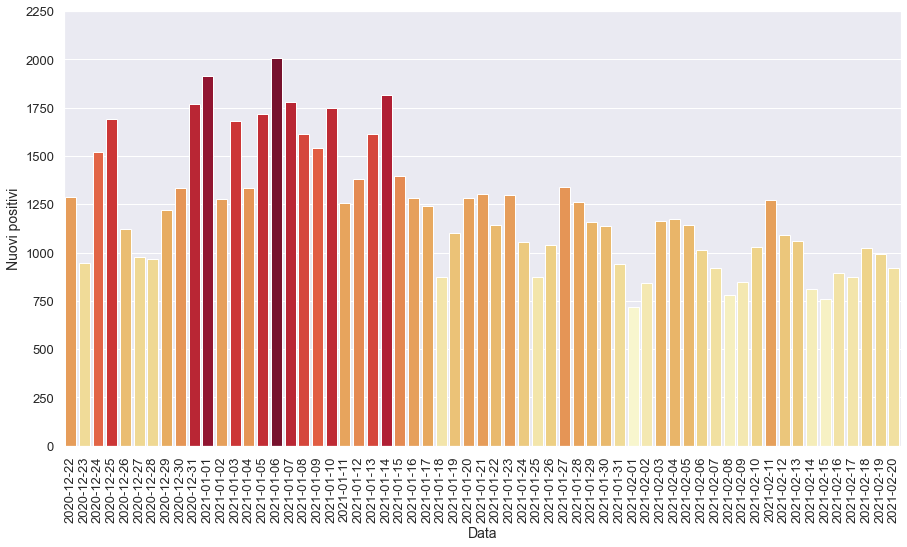

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

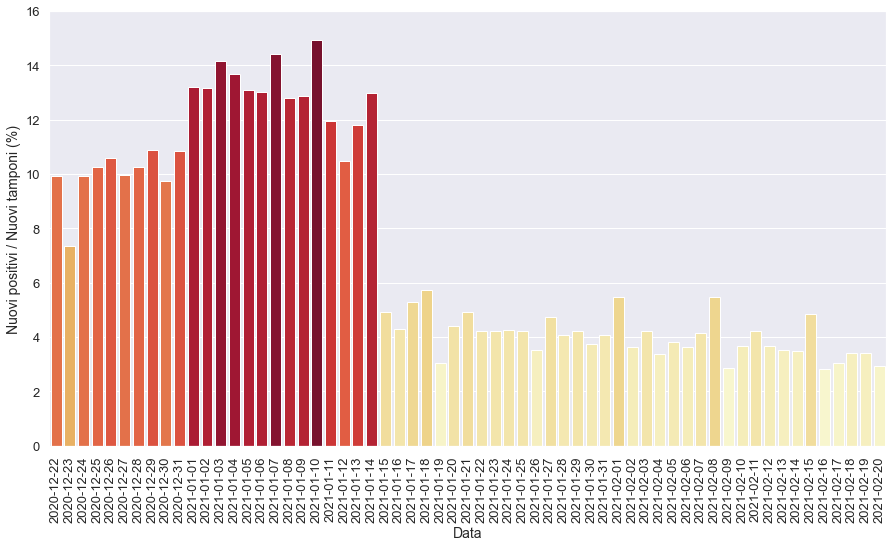

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

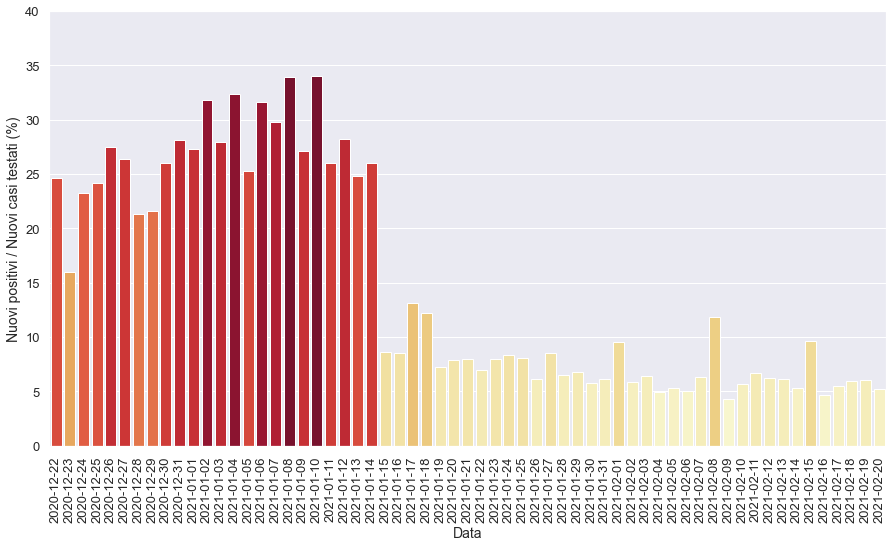

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

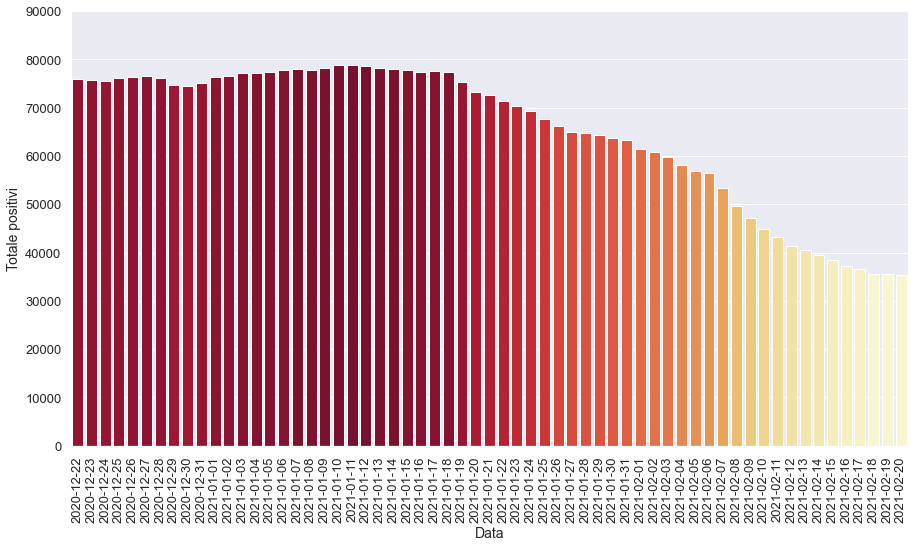

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

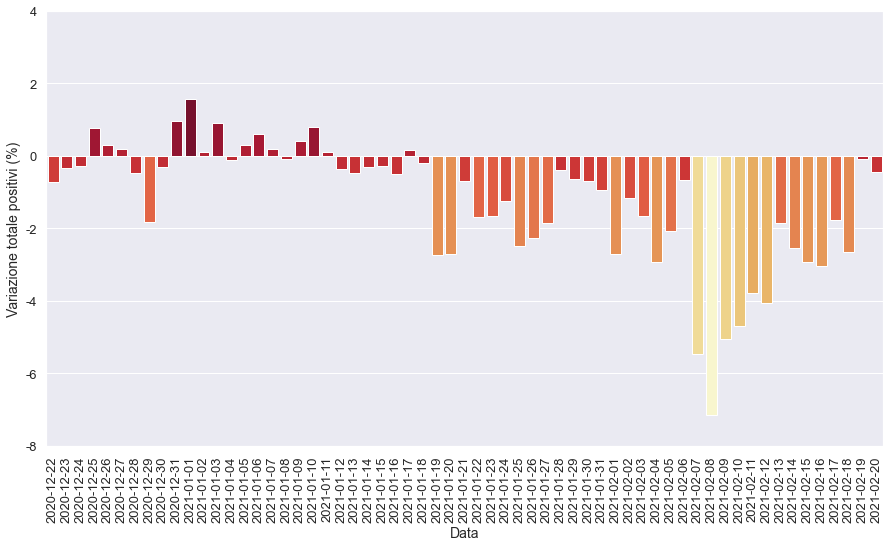

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

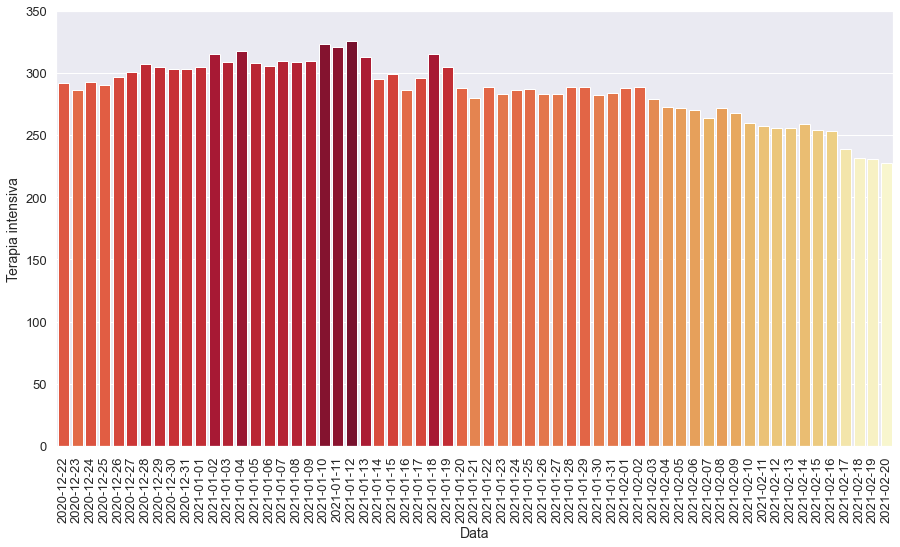

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

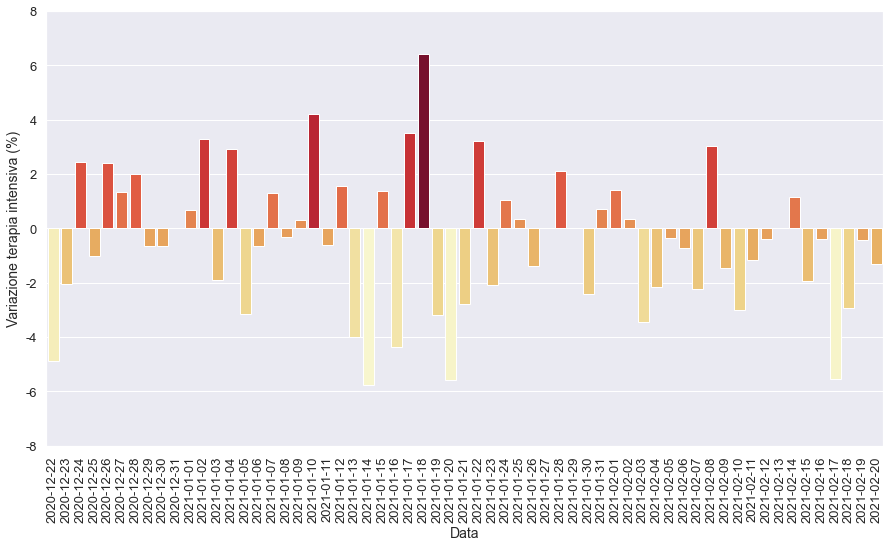

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

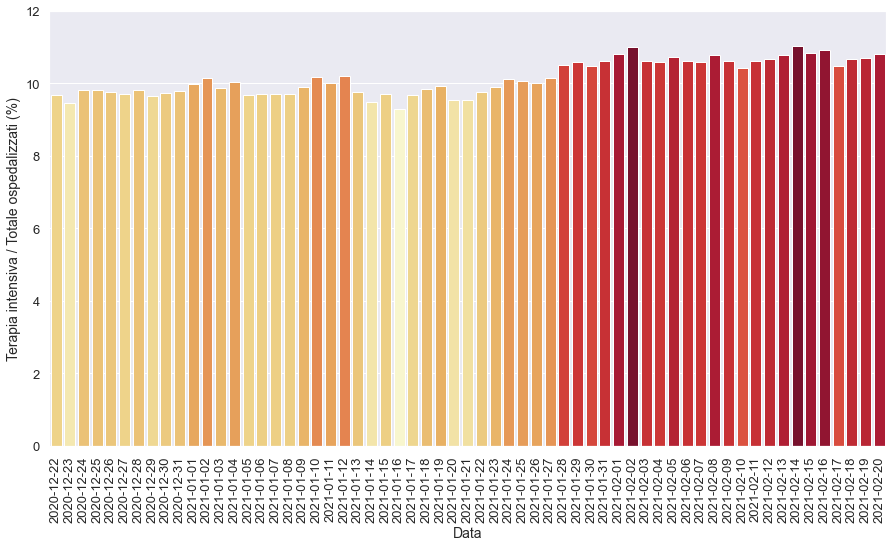

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

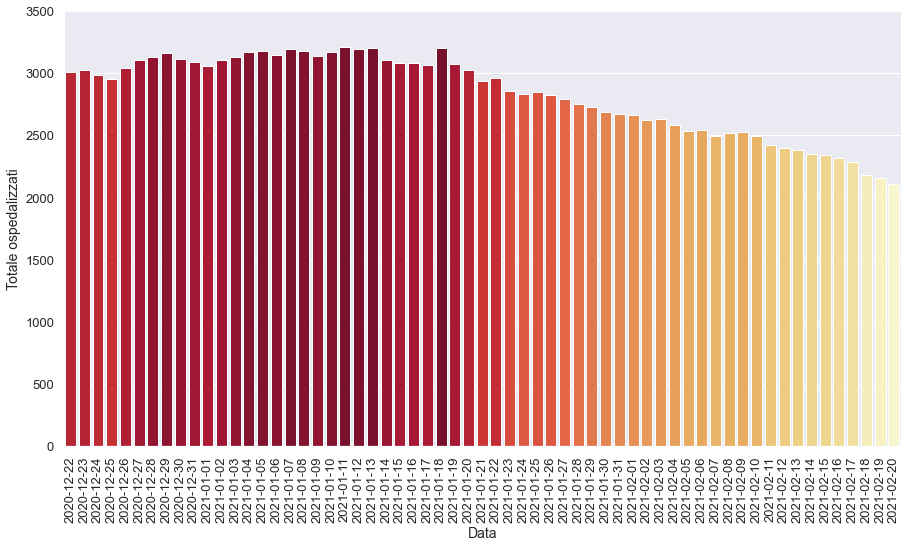

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

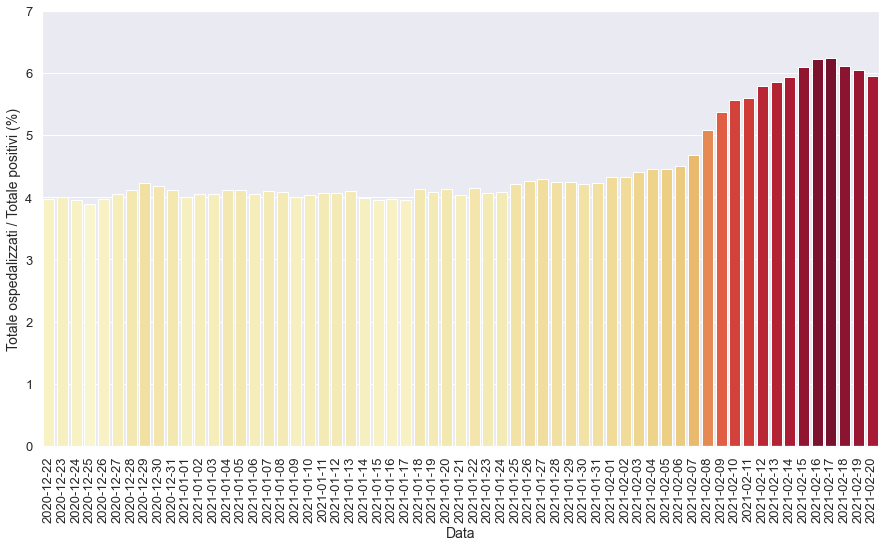

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

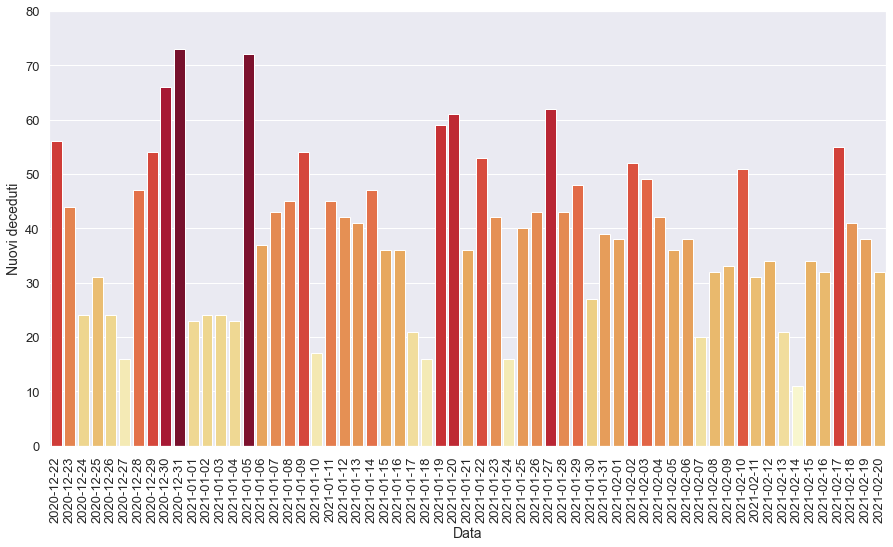

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

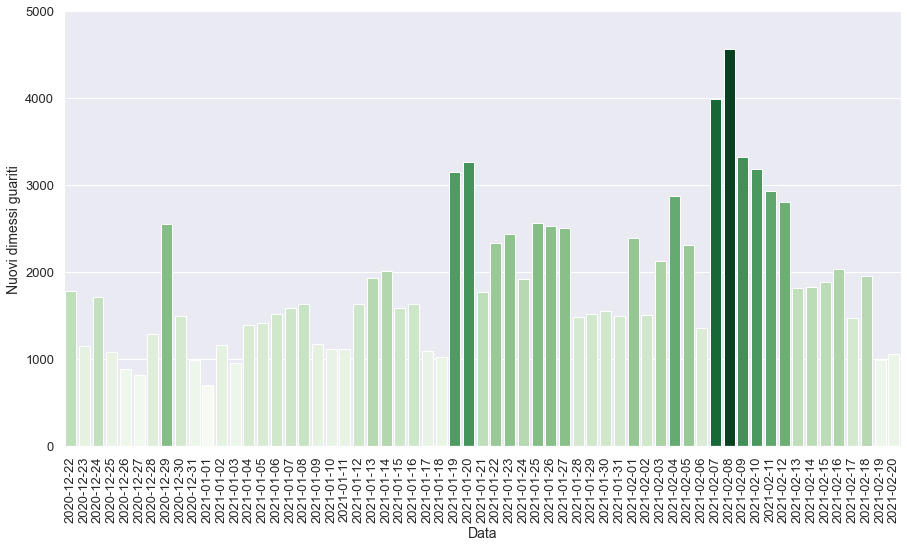

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-21T17:00:00,12,Lazio,2653,280,2933,69752,72685,-504,1303,...,36.0,26408.0,16316.0,-414.0,9.55,4.04,4.93,7.99,-2.78,-0.69
1,2021-01-22T17:00:00,12,Lazio,2673,289,2962,68484,71446,-1239,1141,...,53.0,26992.0,16404.0,-1268.0,9.76,4.15,4.23,6.96,3.21,-1.70
2,2021-01-23T17:00:00,12,Lazio,2576,283,2859,67407,70266,-1180,1297,...,42.0,30588.0,16240.0,-1077.0,9.90,4.07,4.24,7.99,-2.08,-1.65
3,2021-01-24T17:00:00,12,Lazio,2544,286,2830,66555,69385,-881,1056,...,16.0,24756.0,12669.0,-852.0,10.11,4.08,4.27,8.34,1.06,-1.25
4,2021-01-25T17:00:00,12,Lazio,2560,287,2847,64814,67661,-1724,874,...,40.0,20627.0,10805.0,-1741.0,10.08,4.21,4.24,8.09,0.35,-2.48
5,2021-01-26T17:00:00,12,Lazio,2544,283,2827,63305,66132,-1529,1039,...,43.0,29453.0,16805.0,-1509.0,10.01,4.27,3.53,6.18,-1.39,-2.26
6,2021-01-27T17:00:00,12,Lazio,2508,283,2791,62112,64903,-1229,1338,...,62.0,28290.0,15746.0,-1193.0,10.14,4.30,4.73,8.50,0.00,-1.86
7,2021-01-28T17:00:00,12,Lazio,2458,289,2747,61895,64642,-261,1263,...,43.0,30926.0,19503.0,-217.0,10.52,4.25,4.08,6.48,2.12,-0.40
8,2021-01-29T17:00:00,12,Lazio,2438,289,2727,61510,64237,-405,1160,...,48.0,27364.0,17001.0,-385.0,10.60,4.25,4.24,6.82,0.00,-0.63
9,2021-01-30T17:00:00,12,Lazio,2407,282,2689,61106,63795,-442,1138,...,27.0,30386.0,19597.0,-404.0,10.49,4.22,3.75,5.81,-2.42,-0.69


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

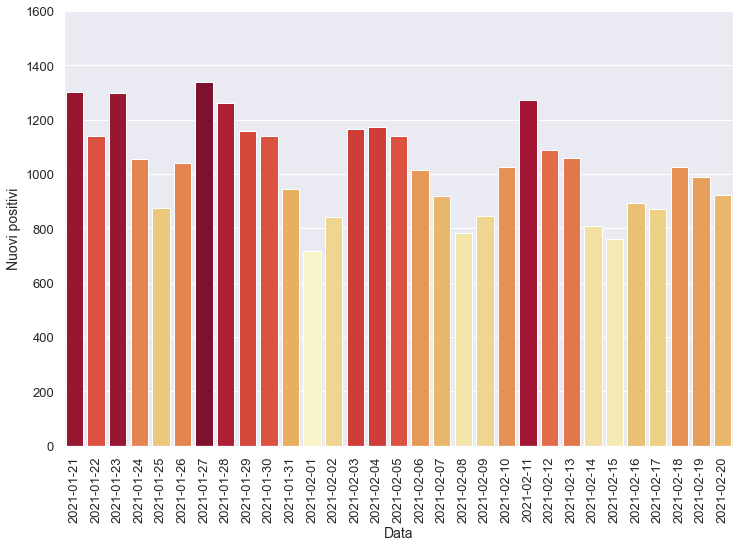

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

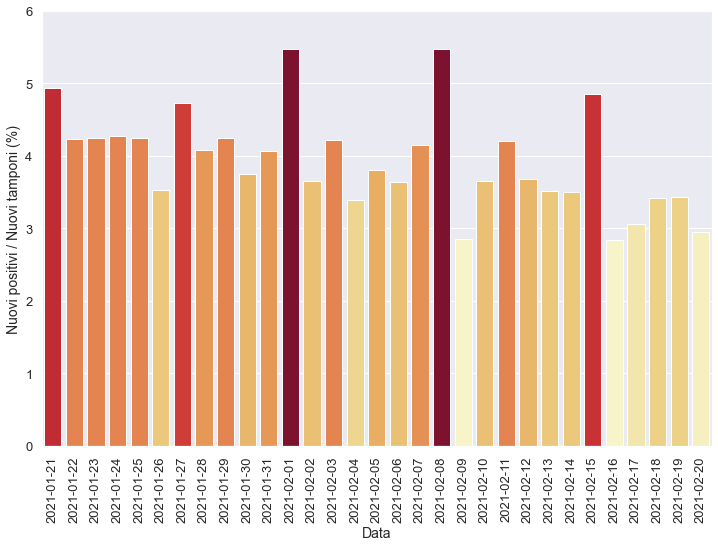

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

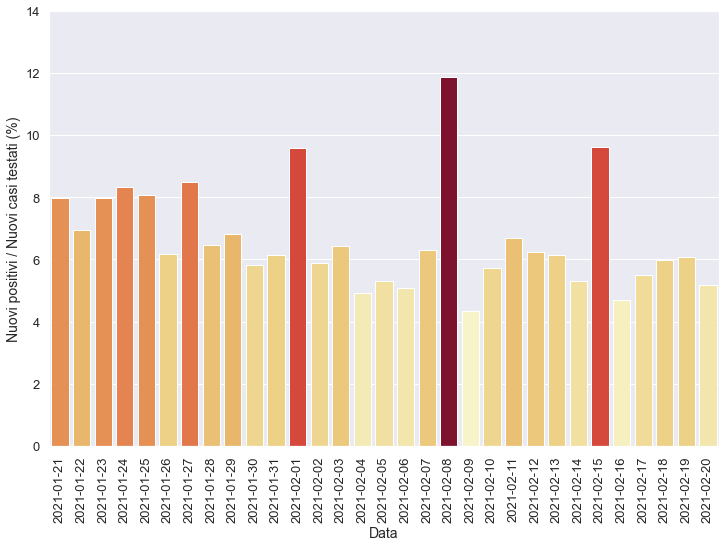

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

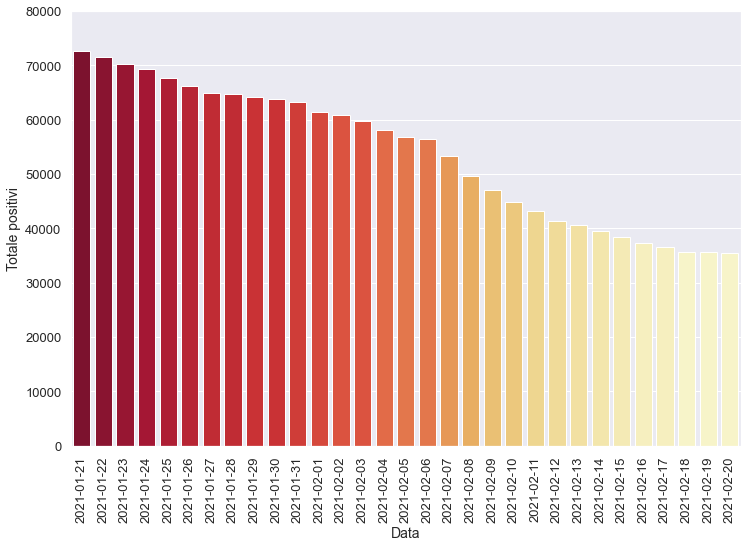

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

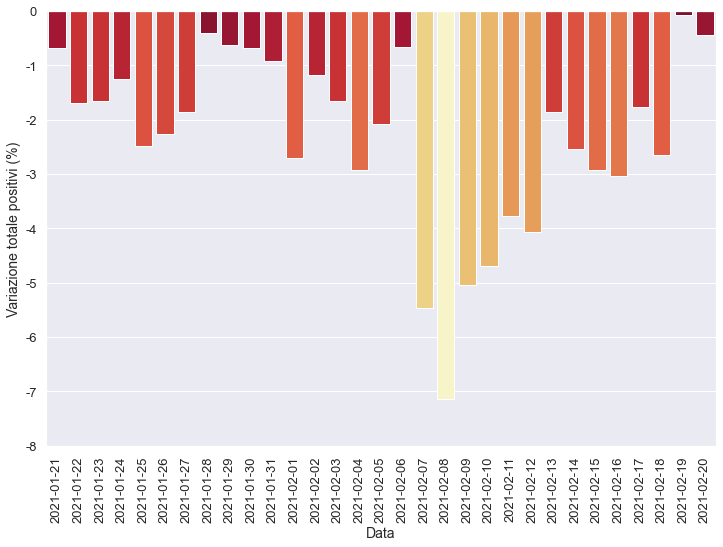

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

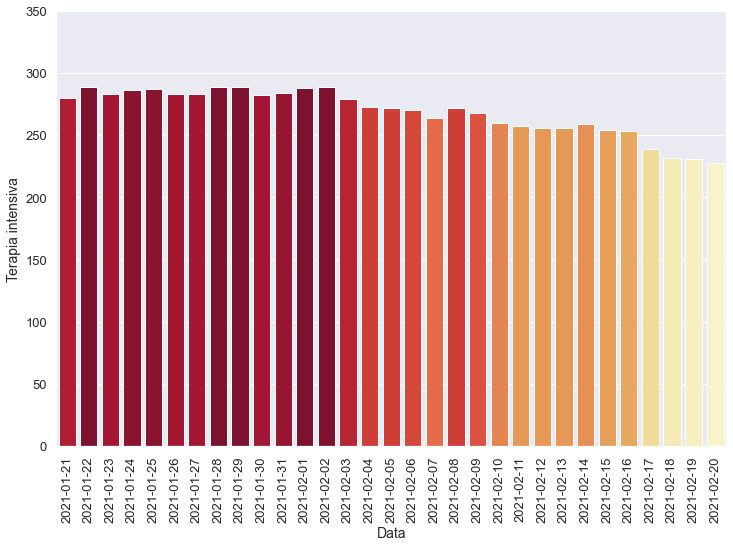

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

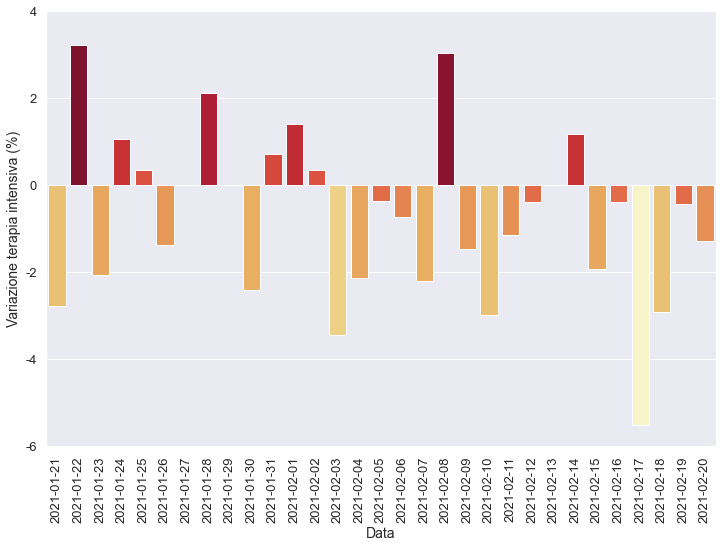

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

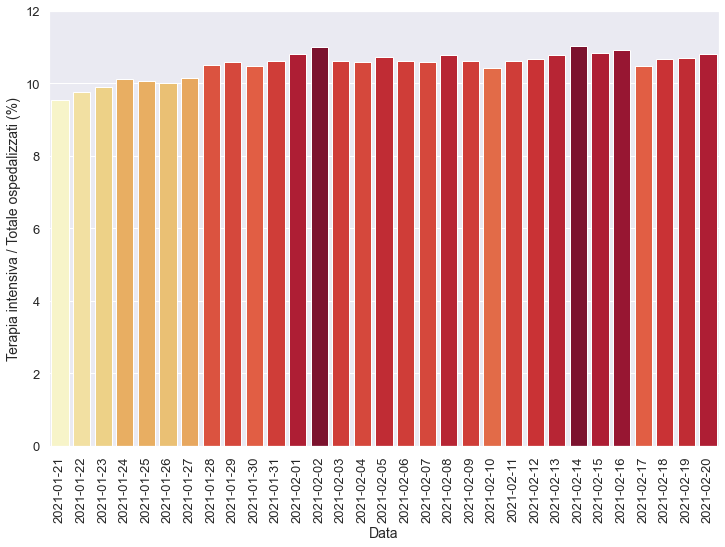

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

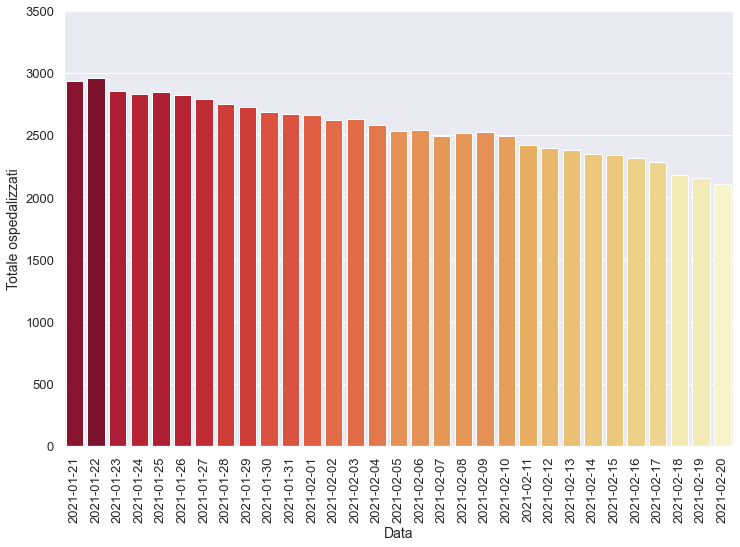

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

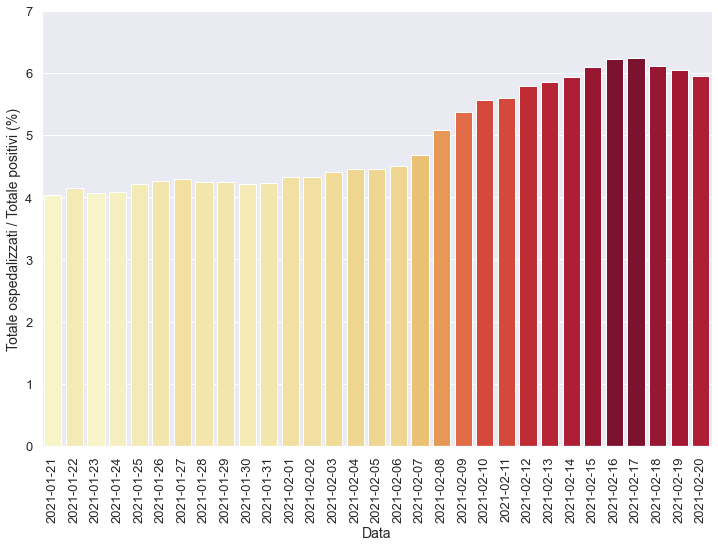

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

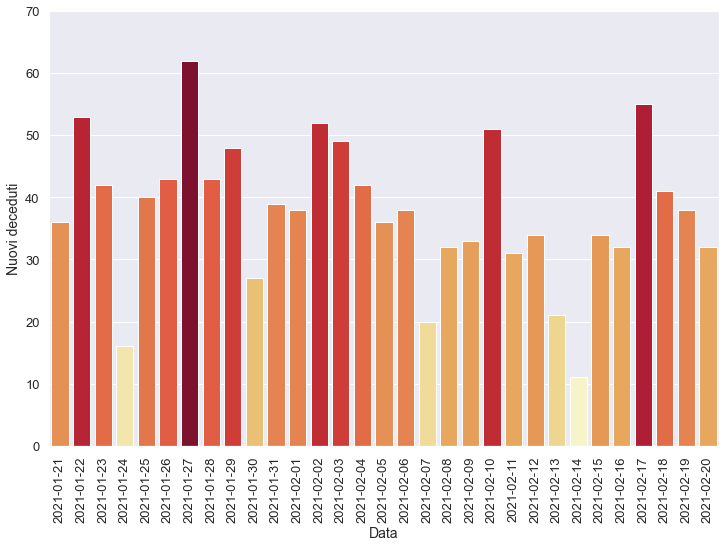

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

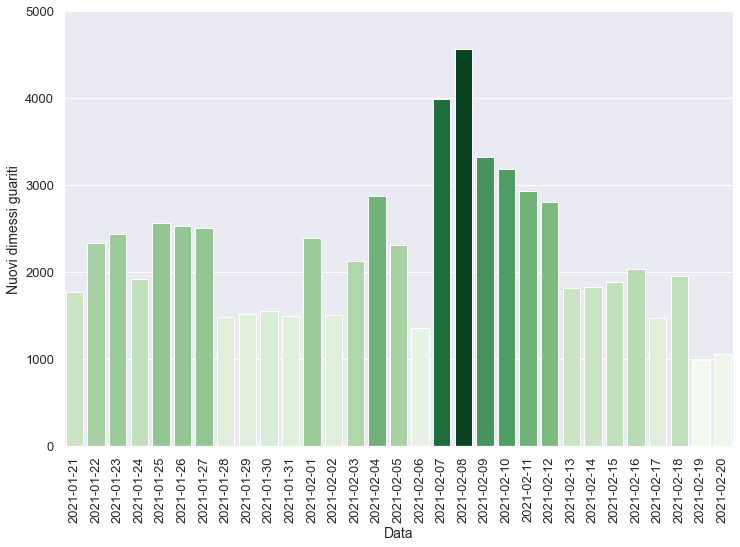

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-13T17:00:00,12,Lazio,2121,256,2377,38245,40622,-771,1060,...,21.0,30188.0,17236.0,-752.0,10.77,5.85,3.51,6.15,0.00,-1.86
1,2021-02-14T17:00:00,12,Lazio,2092,259,2351,37238,39589,-1033,809,...,11.0,23091.0,15236.0,-1007.0,11.02,5.94,3.50,5.31,1.17,-2.54
2,2021-02-15T17:00:00,12,Lazio,2090,254,2344,36086,38430,-1159,760,...,34.0,15654.0,7904.0,-1152.0,10.84,6.10,4.85,9.62,-1.93,-2.93
3,2021-02-16T17:00:00,12,Lazio,2065,253,2318,34943,37261,-1169,894,...,32.0,31499.0,19070.0,-1143.0,10.91,6.22,2.84,4.69,-0.39,-3.04
4,2021-02-17T17:00:00,12,Lazio,2044,239,2283,34324,36607,-654,871,...,55.0,28438.0,15867.0,-619.0,10.47,6.24,3.06,5.49,-5.53,-1.76
5,2021-02-18T17:00:00,12,Lazio,1945,232,2177,33461,35638,-969,1025,...,41.0,29941.0,17100.0,-863.0,10.66,6.11,3.42,5.99,-2.93,-2.65
6,2021-02-19T17:00:00,12,Lazio,1925,231,2156,33452,35608,-30,990,...,38.0,28867.0,16296.0,-9.0,10.71,6.05,3.43,6.08,-0.43,-0.08
7,2021-02-20T17:00:00,12,Lazio,1883,228,2111,33335,35446,-162,921,...,32.0,31269.0,17792.0,-117.0,10.80,5.96,2.95,5.18,-1.30,-0.45


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

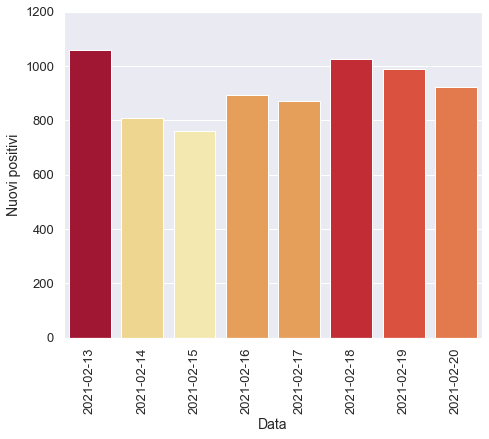

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

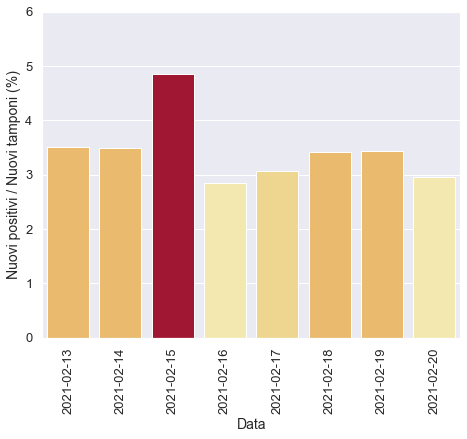

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

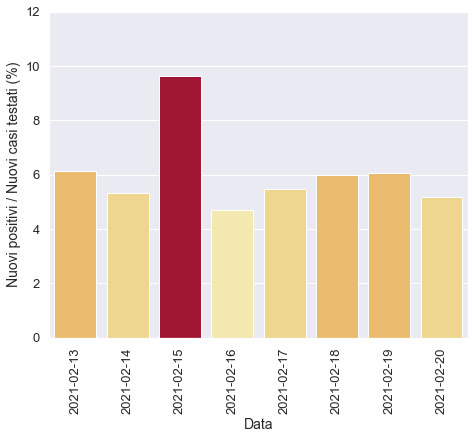

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

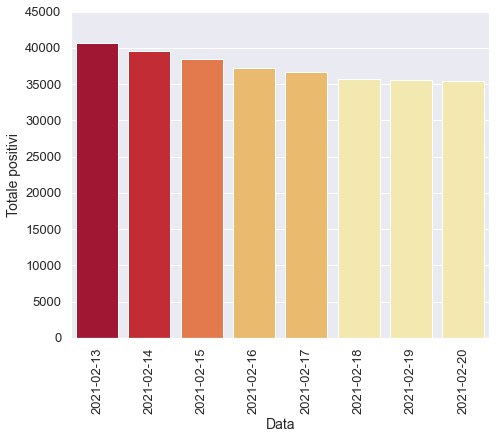

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

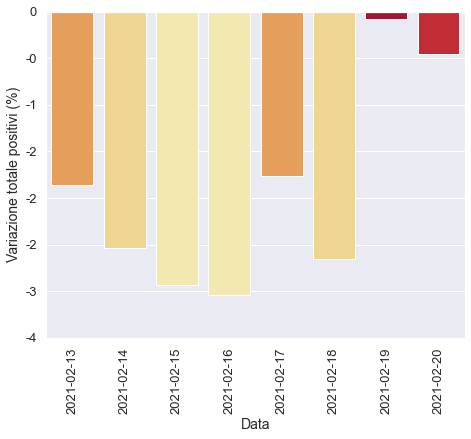

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

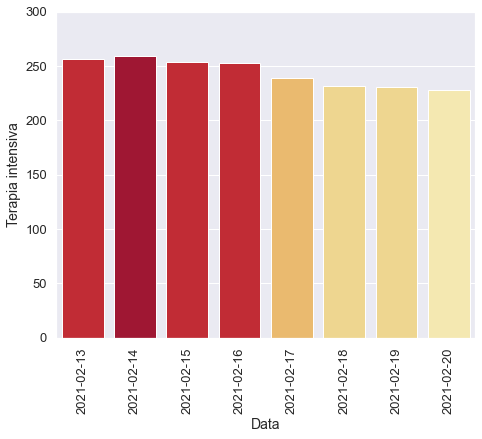

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

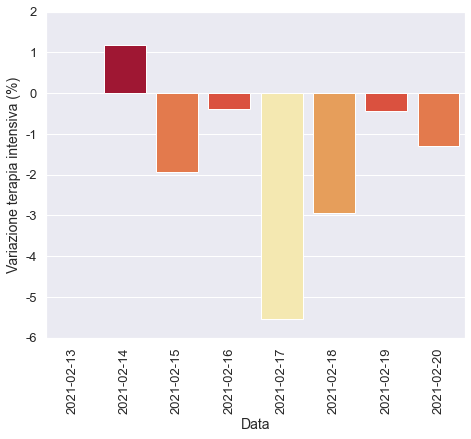

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

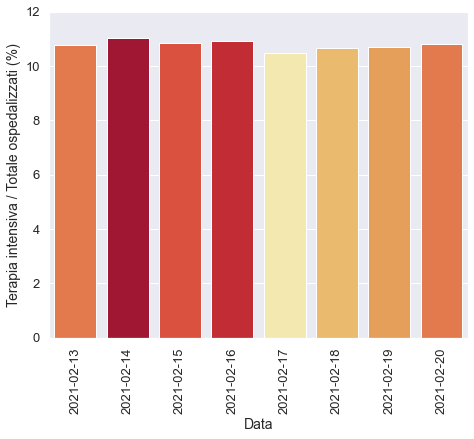

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

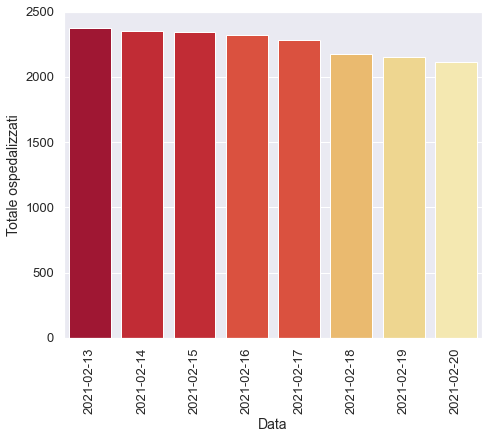

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

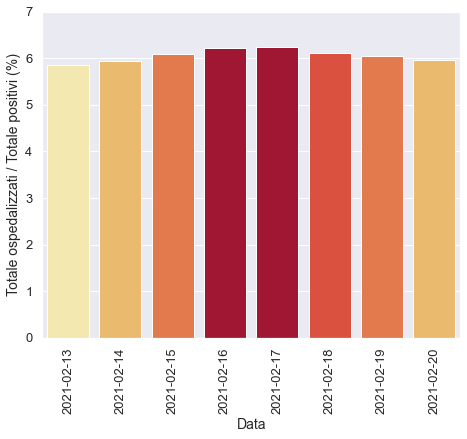

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

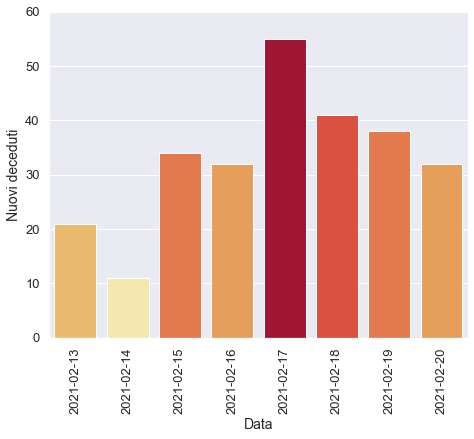

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

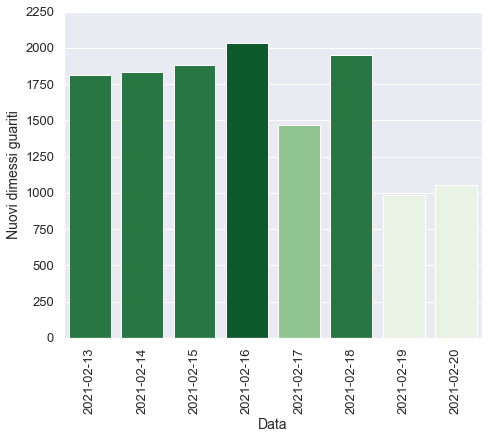

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)